# Data source from Kaggle

# Introduction to Titanic Data Analysis
The Titanic disaster is one of the most well-known maritime tragedies in history, making it a compelling subject for data analysis. The dataset provides a wealth of information about the passengers, including their age, gender, class, and survival status. By analyzing this data, we can uncover insights about the factors that influenced survival rates, identify patterns, and better understand the human aspects behind the numbers.

## Why Analyze the Titanic Dataset?
As a data analyst with a background in project management and healthcare, I am particularly drawn to the Titanic dataset for several reasons:

Historical Significance: The Titanic disaster holds a unique place in history. Analyzing this dataset allows me to connect with a significant event and contribute to a deeper understanding of it through data.

Diverse Data: The dataset includes various features such as passenger demographics, ticket information, and survival status. This diversity provides an excellent opportunity to apply a range of data analysis techniques.

Real-World Application: Understanding the factors that influenced survival can have real-world applications in improving safety protocols and emergency response strategies, both in maritime contexts and other disaster scenarios.

Skill Development: Working with the Titanic dataset helps me refine my data analysis skills, including data cleaning, visualization, and statistical analysis. It also allows me to showcase my ability to handle complex datasets and draw meaningful ways.

## Descriptive, Predictive and Prescriptive Analysis

I will be looking at:


1. Investigate if more men than women survived regardless of class and why?
   
   
2. What was the proportion of the distribution of passenger class, gender and survival rate?
   
   
3. Is there a correlation between age and fare?

 
   
4. If the location of emabarkment affect the fare rate as well as survival rate and why? i.e those embarking from SouthHampton

 
5. What was the highest age range on the ship and their gender and why?
   
   
6. Did passengers in the higher class survived more than does in the lower classes and why?

   
   
7. Did passengers with parents or children on board have higher chance of survival?
   

8. Was the safety protocol readily applicable to all, if so could this have affected the statistics of the survived and what could be done today to mitigate the eventauality of such incident happening again?

    

Through this analysis, I aim to demonstrate my expertise in data analytics and my ability to uncover actionable insights from historical data. I invite you to explore my findings and see how data can bring historical events to life in new and informative ways.



## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

Interpretation: The data above displays all the categories on the table giving some information some main information on the titanic data base such as the fare price, type of classes ..

In [ ]:
# Display the first 10 rows of the DataFrame
df.head(10)

In [ ]:
df.info()

Interpretation: The above data is displaying how many bool, floats, integers, objects in relation to the category and the memory usuage.

## Data Cleaning and Processing

- Check for missing values and handle them appropriately.
- Check for any duplicate entries and remove them if necessary.

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
display("Missing Values:")
display(missing_values)

# Check for duplicate entries
duplicate_entries = df.duplicated().sum()
display("Number of Duplicate Entries:", duplicate_entries)

# Display the first few rows of the cleaned DataFrame
display("Cleaned DataFrame:")
display(df.head())


Interpretation: The above data shows the cleaned data and it new representation in the dataframe

In [ ]:
df['age']

In [ ]:
df.describe()

Interpretation: the described data above shows the count, mean, stand deviation, minimum value, percentage and maximum values of some of the categories in the data( survived	pclass	age	sibsp	parch	fare)

#Summarize the dataset with measures such as mean, median, mode, and standard deviation for numerical features for age and fare

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('titanic.csv')

# Select the columns of interest
numerical_features = df[['age', 'fare']]

# Calculate the summary statistics
summary_stats = numerical_features.agg(['mean', 'median', 'std']).transpose()
summary_stats['mode'] = numerical_features.mode().iloc[0]

print(summary_stats)

#This function takes the titanic dataframe and some of the list of it's numerical features in this case the age and fare, then returns a summary statistics DataFrame with the mean, median, mode, and standard deviation for each feature.
Mean: The average value of the numerical feature.
Median: The middle value when the data is sorted.
Mode: The most frequently occurring value in the data.
Standard Deviation: A measure of the amount of variation or dispersion of a set of values.                                            

## Summary Statistics

- Create a bar chart to compare survival rates across different classes and gender
- create Pie Charts to Display the proportion of different categories, such as the age, gender and survival rate
- Frequency in the distribution of age and fare.
- Understand the counts number of fare purchased by embark towns to determine town affluent towns and majority of passengers by town on board.
- Calculate correlation coefficients between numerical features to identify relationships. Use heatmaps to visualize the correlation matrix.  
                                       

# Data visualizations

## Visualization 1:Proportions of passenger classes, gender and survival rate

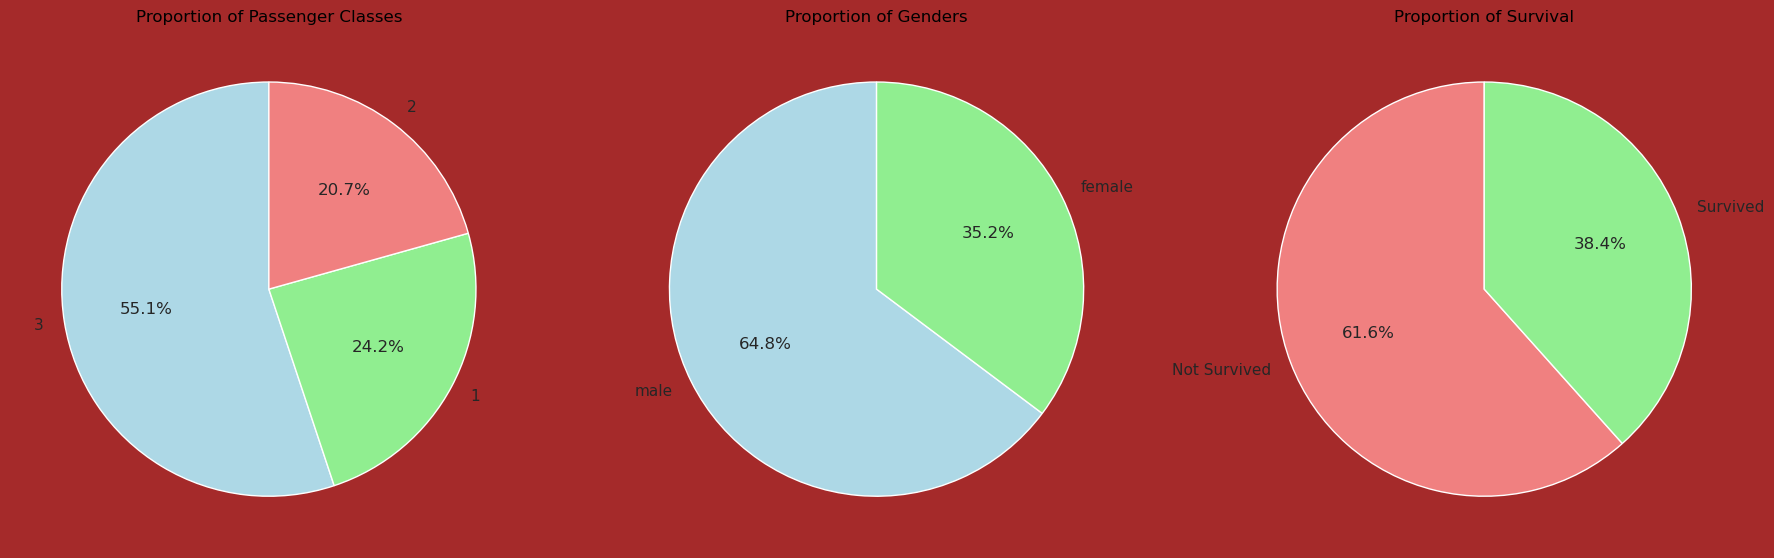

In [113]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Set the background color of the entire figure
fig.patch.set_facecolor('brown')

# Proportion of different classes
class_counts = df['pclass'].value_counts()
axs[0].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
axs[0].set_title('Proportion of Passenger Classes')
axs[0].set_facecolor('lightyellow')  # Set the background color of the subplot

# Proportion of different genders
gender_counts = df['sex'].value_counts()
axs[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
axs[1].set_title('Proportion of Genders')
axs[1].set_facecolor('lightyellow')  # Set the background color of the subplot

# Proportion of survival
survival_counts = df['survived'].value_counts()
axs[2].pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
axs[2].set_title('Proportion of Survival')
axs[2].set_facecolor('lightyellow')  # Set the background color of the subplot
# Customize the text and grid color for better visibility (optional)

for ax in axs:
    
 ax.title.set_color('black')
 ax.grid(False)
 ax.set_xticks([])
 ax.set_yticks([])

# Display the pie charts
plt.tight_layout()
plt.show()

This function creates a figure with three subplots, each containing a pie chart. The pie charts display the proportions of passenger classes, genders, and survival status.

Proportion of passenger classes:  1st(24.2%), 2nd(20.7%) and 3rd(55.1%)

Proportion of genders: Male-64.8% and female- 35%

Proportion of survived (38.4%) and non survived(61.6%)

## Visualization 2: survival rates across different classes and gender

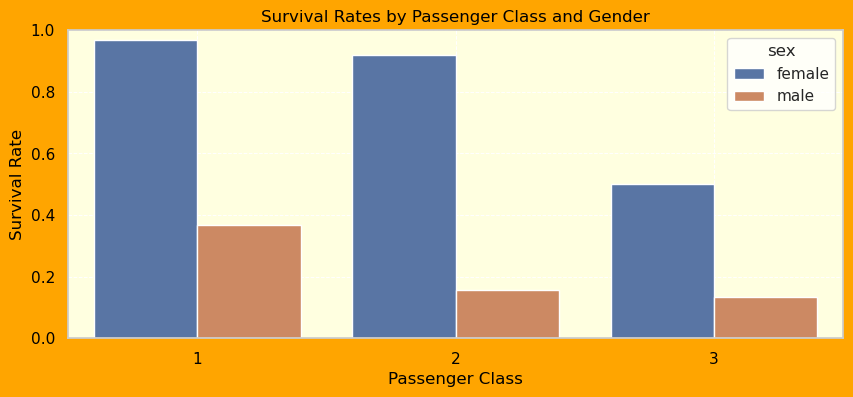

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv('titanic.csv')

def plot_survival_rates_with_background(df):
    # Calculate survival rates
    survival_rates = df.groupby(['pclass', 'sex'])['survived'].mean().reset_index()

    # Create a figure and axis with custom background colors
    fig, ax = plt.subplots(figsize=(10, 4))
    fig.patch.set_facecolor('orange')  # Set the background color of the entire figure
    ax.set_facecolor('lightyellow')    # Set the background color of the plot area

    # Plotting the bar chart
    sns.barplot(x='pclass', y='survived', hue='sex', data=survival_rates, ax=ax)
    ax.set_title('Survival Rates by Passenger Class and Gender')
    ax.set_xlabel('Passenger Class')
    ax.set_ylabel('Survival Rate')
    ax.set_ylim(0, 1)

    # Customize the text and grid color for better visibility
    ax.title.set_color('black')
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.tick_params(colors='black')
    ax.grid(True, color='white', linestyle='--', linewidth=0.7)

    # Show the plot
    plt.show()

# Example usage
plot_survival_rates_with_background(df)

Interpretaion: The survival rate of gender by class suggests that more females survived than male with the survival rate of( 90%  -1st), (85%- 2nd) and (50% -3rd)classes. Suggesting that passengers in higher classes had a higher survival rate. Lower class passengers  had a lower survival rate.

Why?

It is of the notion that females appear more vulnulreble than their male coounterpart hence the norm/instinct will be to protect the females first. It might even be aligned to the idea of reproduction as females are the species who can reproduce to t protect the human species. Some might argue this.

## Visualization 3: Distribution of age and fare

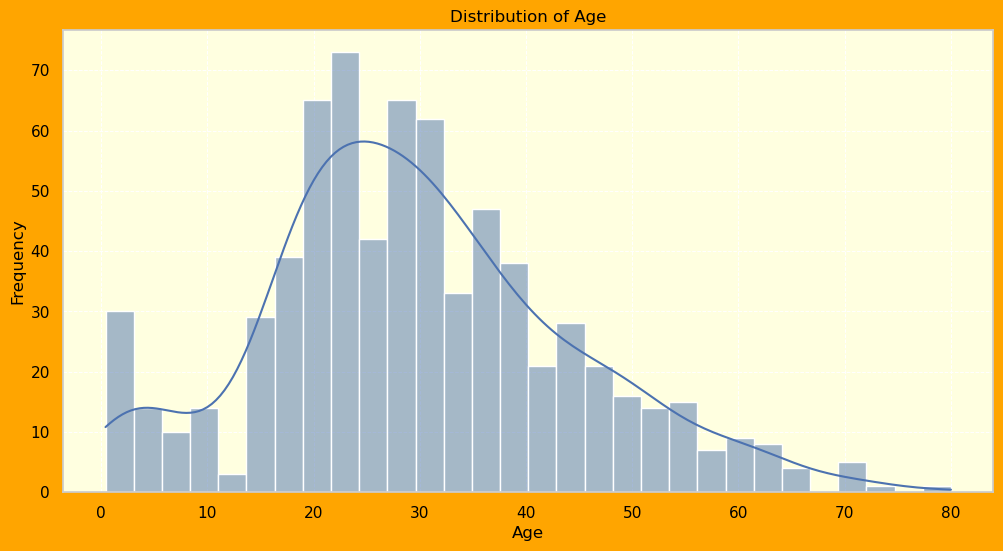

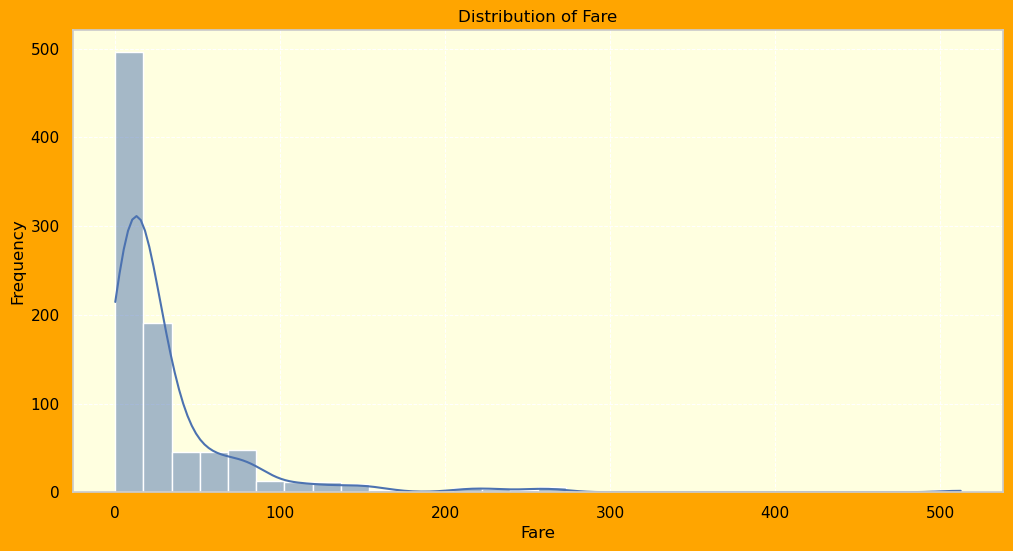

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv('titanic.csv')

def plot_histograms_with_background(df):
    # Create a histogram for the 'age' feature
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.patch.set_facecolor('orange')  # Set the background color of the entire figure
    ax.set_facecolor('lightyellow')    # Set the background color of the plot area
    sns.histplot(df['age'].dropna(), bins=30, kde=True, ax=ax)
    ax.set_title('Distribution of Age')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    
    # Customize the grid and text color for better visibility
    ax.grid(True, color='white', linestyle='--', linewidth=0.7)
    ax.title.set_color('black')
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.tick_params(colors='black')
    
    plt.show()

    # Create a histogram for the 'fare' feature
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.patch.set_facecolor('orange')  # Set the background color of the entire figure
    ax.set_facecolor('lightyellow')    # Set the background color of the plot area
    sns.histplot(df['fare'].dropna(), bins=30, kde=True, ax=ax)
    ax.set_title('Distribution of Fare')
    ax.set_xlabel('Fare')
    ax.set_ylabel('Frequency')
    
    # Customize the grid and text color for better visibility
    ax.grid(True, color='white', linestyle='--', linewidth=0.7)
    ax.title.set_color('black')
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.tick_params(colors='black')
    
    plt.show()

# Example usage
plot_histograms_with_background(df)

Interpretation: The above visualization used is to show the distribution of numerical data. They both represent the frequency of data points within specified ranges (bins). In the context of the Titanic dataset, the histogram visualization can help us understand how features such as age and fare are distributed among the passengers.

The age distribution also shows that majority of the passengers were between their 20s and 40s and they paid the lower rate also majorly men. It can also be highlighted that they had the lowest survival rate.

## Visualization 4: Numbers of passengers from different embark towns

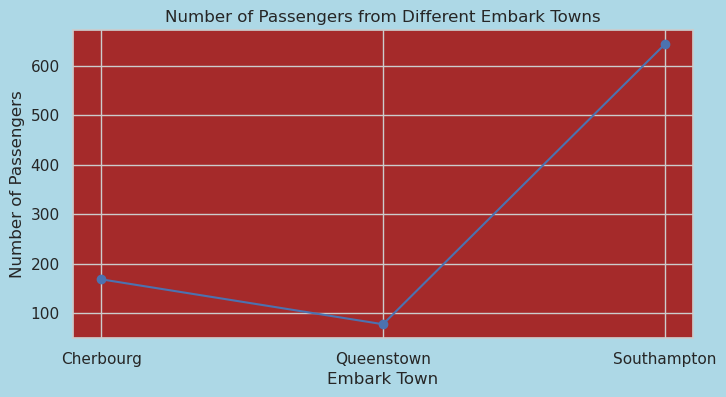

In [116]:
# Count the number of passengers from each embark town
embark_town_counts = df['embark_town'].value_counts()

# Sort the values to make the graph more readable
embark_town_counts = embark_town_counts.sort_index()

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))
    
# Set the background color
fig.patch.set_facecolor('lightblue')  # Background of the entire figure
ax.set_facecolor('brown')         # Background of the plot area

# Plot the results
ax.plot(embark_town_counts.index, embark_town_counts.values, marker='o', linestyle='-')

# Customize the plot
plt.title('Number of Passengers from Different Embark Towns')
plt.xlabel('Embark Town')
plt.ylabel('Number of Passengers')
plt.grid(True)

# Show the plot
plt.show()



Interpretation: This function generates a line chart showing the names of the towns of embarkment, number of passengers and how many fares paid by passengers from different embarkment towns. Southhampton having the highest number of fare. 

## Visualization 5: Classes of fare purchased by different embark town

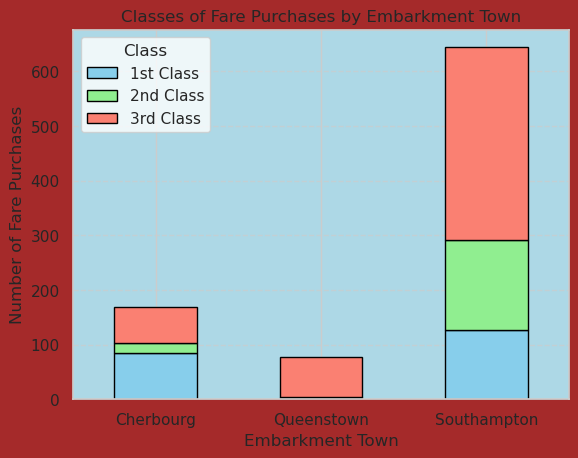

In [117]:
# Group by embarkment town and fare class, and count the number of fare purchases
fare_classes_by_embark_town = df.groupby(['embark_town', 'pclass']).size().unstack()

# Create the plot
fig, ax = plt.subplots()
    
# Set the background color
fig.patch.set_facecolor('brown')  # Background of the entire figure
ax.set_facecolor('lightblue')    # Background of the plot area

# Plot the results
fare_classes_by_embark_town.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black', ax=ax)

# Customize the plot
plt.title('Classes of Fare Purchases by Embarkment Town')
plt.xlabel('Embarkment Town')
plt.ylabel('Number of Fare Purchases')
plt.xticks(rotation=0)
plt.legend(title='Class', labels=['1st Class', '2nd Class', '3rd Class'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Interpretation: A stacked chart highlighting the the number of fare purchased per class and town. Southhampton being the highest number of fare and passengers in all classes. This shows that Southhampton is an affluent city and that majority of the passengers on baord were from southhampton

## Visualization 6: Survival rate by groups (children, woman and other)

Accuracy: 0.7821229050279329
Confusion Matrix:
[[88 17]
 [22 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



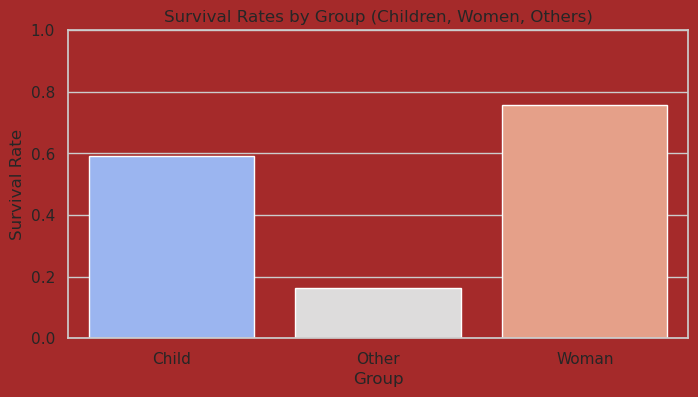

In [118]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Dataset
df = pd.read_csv('titanic.csv')

# Feature Selection
# Create 'is_child' for age < 16 and 'is_woman' for female passengers
df['is_child'] = df['age'] < 16
df['is_woman'] = df['sex'] == 'female'

# Preprocess Data
# Fill missing values
df['age'].fillna(df['age'].median(), inplace=True)

# Create the feature set and target variable
X = df[['is_child', 'is_woman']]
y = df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Create Graph
# Calculate survival rates for children, women, and others
df['group'] = np.where(df['is_child'], 'Child', np.where(df['is_woman'], 'Woman', 'Other'))
survival_rates = df.groupby('group')['survived'].mean()

# Plot Bar Graph
plt.figure(figsize=(8, 4), facecolor='brown')  # Set background color
sns.set(style='whitegrid')
ax = sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='coolwarm')
ax.set_facecolor('brown')  # Set graph background color
plt.xlabel('Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Group (Children, Women, Others)')
plt.ylim(0, 1)
plt.show()

Interpretation: Using the groupby method, the graph demonstartes the number of survival rate between women, children and other. More women survived

# Correlation Analysis

## Heat Map
### Visualizing Correlation with a Heatmap

To better visualize these correlations, here is a heatmap, which provides a color-coded representation of the correlation matrix:

Using a heatmap to visualize the correlation matrix helps quickly identify the strength and direction of relationships between variables. Darker shades indicate stronger correlations, and lighter shades indicate weaker correlations. Positive correlations are typically shown in one color.

## Correlation Matrix for Titanic

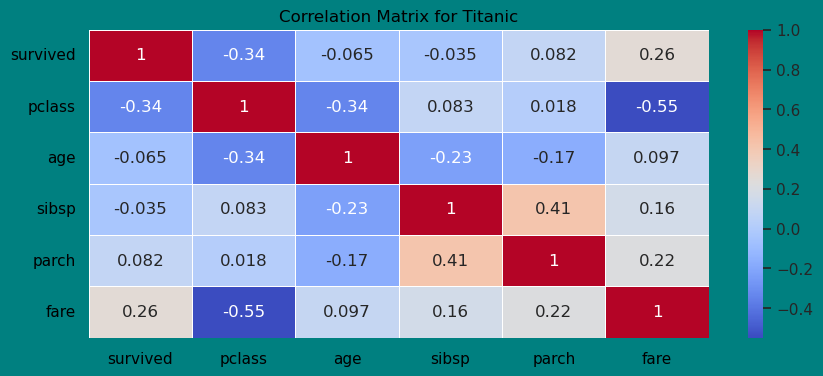

In [112]:
def plot_correlation_matrix_with_background(df):
    # Calculate correlation matrix
    correlation_matrix = df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].corr()

    # Create a figure and axis with custom background colors
    fig, ax = plt.subplots(figsize=(10, 4))
    fig.patch.set_facecolor('teal')  # Set the background color of the entire figure
    ax.set_facecolor('lightyellow')    # Set the background color of the plot area

    # Plotting the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)
    ax.set_title('Correlation Matrix for Titanic')

    # Customize the text and grid color for better visibility
    ax.title.set_color('black')
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.tick_params(colors='black')

    # Show the plot
    plt.show()

# Example usage
plot_correlation_matrix_with_background(df)

Interpretation: The correlation matrix provides the correlation coefficients for each pair of variables. 
Correlation measures the strength and direction of a linear relationship between two variables. It ranges from -1 to 1

**Survived and Pclass: -0.335**

Interpretation: There's a moderate negative correlation between survival and passenger class. This means that passengers in higher classes (lower pclass values) had a higher survival rate. Lower class passengers (higher pclass values) had a lower survival rate.

**Survived and Sibsp: 0.016**

Interpretation: There's a very weak positive correlation between survival and the number of siblings/spouses aboard. This indicates a negligible relationship, suggesting that having siblings or spouses on board had little to no impact on survival.

**Survived and Parch: 0.082**

Interpretation: There's a weak positive correlation between survival and the number of parents/children aboard. This means that passengers with parents or children on board had a slightly higher chance of survival, but the effect is small.

**Survived and Fare: 0.257**

Interpretation: There's a moderate positive correlation between survival and fare. This indicates that passengers who paid higher fares had a better chance of surviving.

**Pclass and Fare: -0.550**

Interpretation: There's a strong negative correlation between passenger class and fare. Higher class passengers (lower pclass values) paid higher fares, while lower class passengers (higher pclass values) paid lower fares.

# Conclusion

The analysis of the Titanic dataset provides valuable insights into the factors that influenced passenger survival during this historic maritime disaster. Key findings include the significant impact of socio-economic status, as evidenced by the higher survival rates among first-class passengers compared to those in lower classes. Gender also played a crucial role, with women having a higher likelihood of survival than men, aligning with the "women and children first" evacuation protocol.

Age was another important factor, with children having higher survival rates, particularly those traveling with family members. The analysis of fare and embarkation points revealed that passengers who paid higher fares and those who boarded at certain ports had better survival chances, highlighting the influence of travel circumstances and location.

The correlation analysis and visualizations such as heatmaps and bar charts effectively illustrated the relationships between various features and survival rates. These insights not only deepen our understanding of the Titanic disaster but also underscore the importance of data-driven decision-making in enhancing safety protocols and emergency response strategies in modern contexts.The correlation matrix for the Titanic dataset reveals various relationships between key variables. 

There is a moderate negative correlation (-0.335) between survival and passenger class, indicating that higher class passengers had a higher survival rate. The relationship between survival and age is very weakly negative (-0.077), suggesting minimal impact of age on survival. The correlation between survival and the number of siblings/spouses aboard is very weakly positive (0.016), showing negligible impact, while the number of parents/children aboard has a slightly stronger but still weak positive correlation (0.082) with survival, indicating a slight increase in survival chances for those with family on board. A moderate positive correlation (0.257) exists between survival and fare, implying that passengers who paid higher fares had a better chance of surviving. Lastly, there is a strong negative correlation (-0.550) between passenger class and fare, showing that higher class passengers paid significantly higher fares compared to lower class passengers.

Overall, this analysis demonstrates the power of data in unraveling historical events and provides a comprehensive framework for applying similar techniques to other datasets. 

# Predictive Analysis/ Reflections

**Was the safety protocol applicable to all and would it have affected the survival rate?**

 The safety protocol was readily available to passengers in the first class before any other class. 

**Would it have affected the survival rate?**

The correlation indicates a negligible relationship, suggesting that having siblings or spouses on board had little to no impact on survival. This just demonstrates that when there is a life and death situation, the human instinct is that its life is priority in respective of siblings of spouses

**Mitigation put in place to avoid such incident from happening in future**
There is now availabilityy of modern technology to build a more modern ship. 
More advanced sailors with rich technical know how with the help of modern technology i.e weather focast
No risk of overcrowding for health and safety reasons. More so, to avoid lawsuit which could result to a lot of compensation to passengers as well jail terms.